# Continuous Function Approximater

> A single hidden layer neural network with a linear output unit can approximate any continuous function arbitrarily well, given enough hidden units.

This IPython notebook walks through the anatomy of a feed-forward neural network written in Tensorflow with (purposely) a single hidden layer, and demonstrates how well or poorly the said neural network approximates some function.

In [93]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [94]:
# Tweak the values below
n_train = 5000
n_test = 100
X_min = -10.
X_max = 10.
n_hidden_units = 200
learning_rate = 0.008
num_steps = 801

def func_to_approximate(X):
    return np.square(X)

# Sanity check
assert n_train > 0
assert n_test > 0
assert X_max > X_min

In [95]:
X_interval = X_max - X_min
# Generate training data
X_train = np.random.random_sample((n_train, 1)) * X_interval + X_min
y_train = func_to_approximate(X_train)
# Generate test data
X_test = np.random.random_sample((n_test, 1)) * X_interval + X_min
y_test = func_to_approximate(X_test)

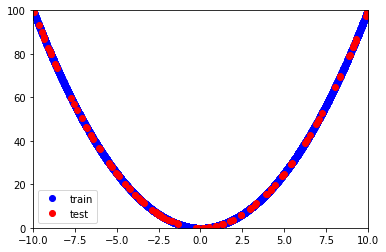

In [96]:
# Plot training data and test data
plt.figure()
plt.axis([X_min, X_max, min(y_train), max(y_train)])
plt.plot(X_train, y_train, 'bo', label='train')
plt.plot(X_test, y_test, 'ro', label='test')
plt.legend()
plt.show()

In [97]:
# Construct computation graph
X_placeholder = tf.placeholder(tf.float32, shape=(None, 1), name='X_placeholder')
y_placeholder = tf.placeholder(tf.float32, shape=(None, 1), name='y_placeholder')

h_weights = tf.Variable(
    tf.truncated_normal([1, n_hidden_units]),
    name='h_weights')
h_biases = tf.Variable(tf.zeros([n_hidden_units]),
                       name='h_biases')

out_weights = tf.Variable(
    tf.truncated_normal([n_hidden_units, 1]),
    name='out_weights')
out_biases = tf.Variable(tf.zeros([1]),
                         name='out_biases')

hidden = tf.nn.sigmoid(tf.matmul(X_placeholder, h_weights) + h_biases)
y = tf.matmul(hidden, out_weights) + out_biases

In [98]:
# Loss function and optimizer
loss = tf.reduce_mean(tf.square(y - y_placeholder))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

========== Step 0 ==========
loss_train 2325.28 loss_test 1083.92


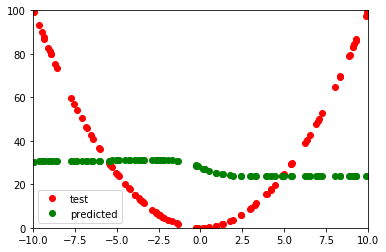

========== Step 40 ==========
loss_train 353.334 loss_test 422.9


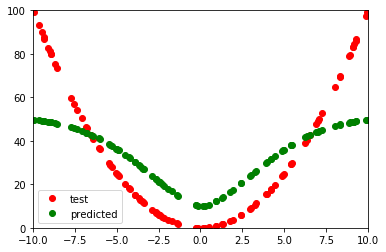

========== Step 80 ==========
loss_train 529.031 loss_test 256.113


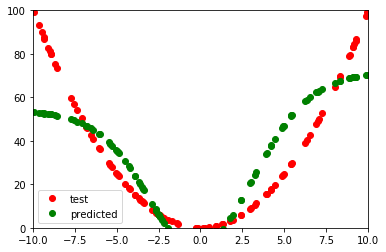

========== Step 120 ==========
loss_train 194.114 loss_test 202.856


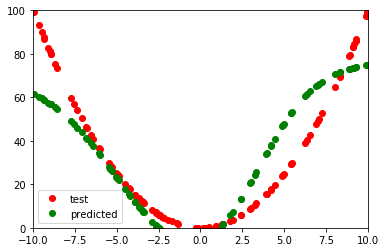

========== Step 160 ==========
loss_train 180.649 loss_test 187.404


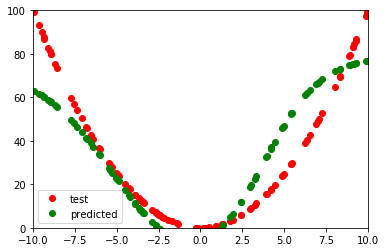

========== Step 200 ==========
loss_train 164.786 loss_test 170.377


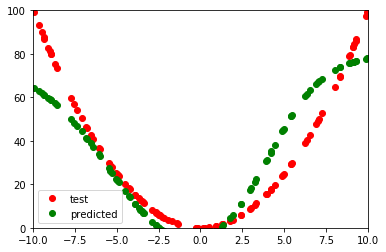

========== Step 240 ==========
loss_train 150.546 loss_test 155.217


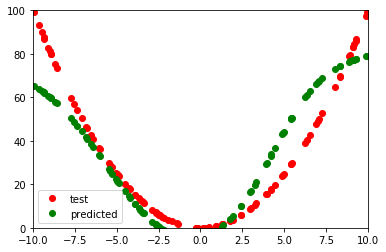

========== Step 280 ==========
loss_train 138.174 loss_test 142.118


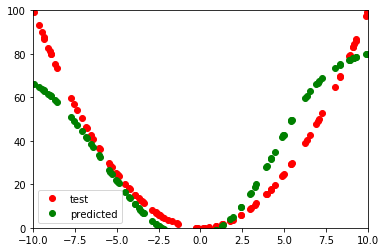

========== Step 320 ==========
loss_train 127.422 loss_test 130.749


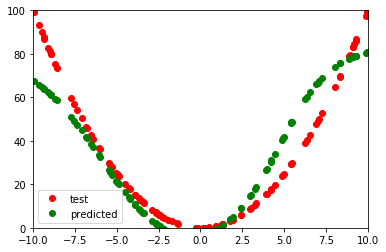

========== Step 360 ==========
loss_train 118.037 loss_test 120.833


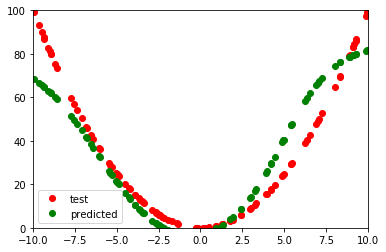

========== Step 400 ==========
loss_train 109.819 loss_test 112.143


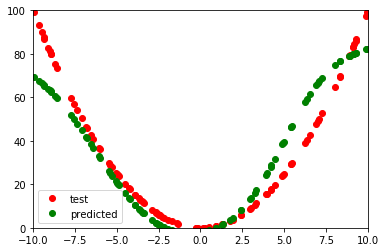

========== Step 440 ==========
loss_train 102.597 loss_test 104.489


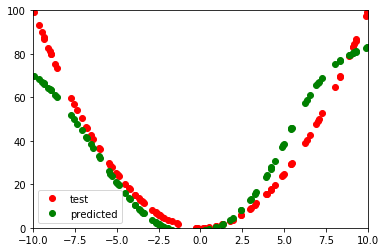

========== Step 480 ==========
loss_train 96.2083 loss_test 97.7113


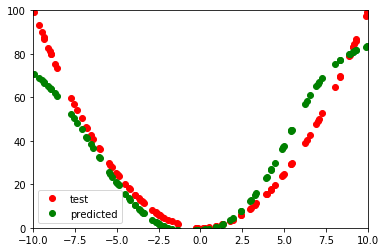

========== Step 520 ==========
loss_train 90.5199 loss_test 91.6818


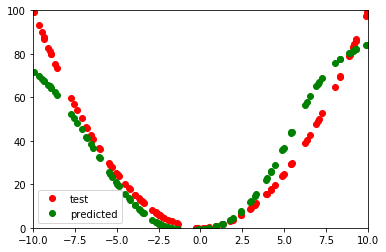

========== Step 560 ==========
loss_train 85.4301 loss_test 86.2955


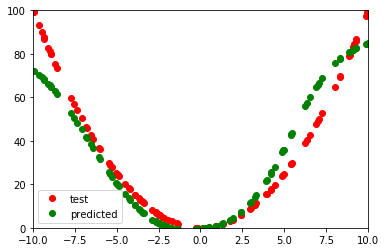

========== Step 600 ==========
loss_train 80.8538 loss_test 81.4633


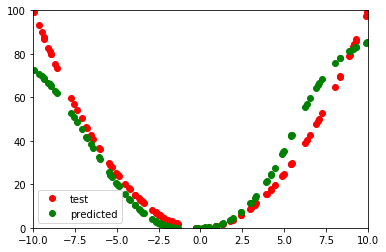

========== Step 640 ==========
loss_train 76.7168 loss_test 77.1089


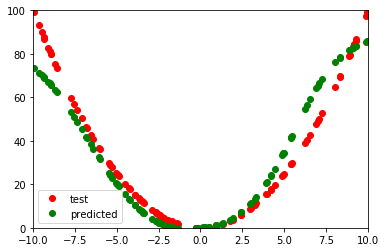

========== Step 680 ==========
loss_train 72.9568 loss_test 73.1671


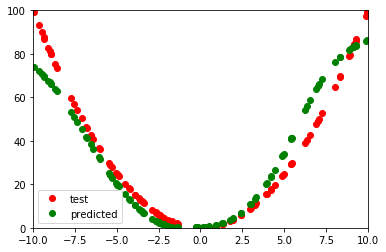

========== Step 720 ==========
loss_train 69.5223 loss_test 69.5829


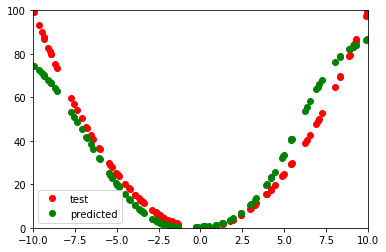

========== Step 760 ==========
loss_train 66.3709 loss_test 66.3103


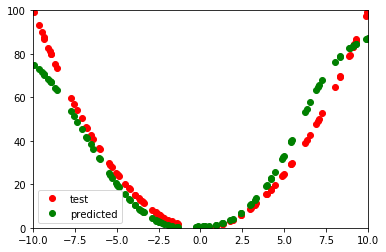

========== Step 800 ==========
loss_train 63.4675 loss_test 63.3107


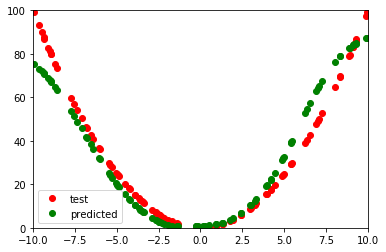

In [99]:
with tf.Session() as session:
    init = tf.global_variables_initializer()
    session.run(init)

    for step in range(num_steps):
        feed_dict_train = {X_placeholder: X_train, y_placeholder : y_train}
        _, loss_train = session.run([train, loss], feed_dict=feed_dict_train)
        
        if step % 40 == 0:
            feed_dict_test = {X_placeholder: X_test, y_placeholder : y_test}
            loss_test, y_test_predicted = session.run([loss, y], feed_dict=feed_dict_test)
            print('========== Step', step, '==========')
            print('loss_train', loss_train, 'loss_test', loss_test)
            plt.figure()
            plt.axis([X_min, X_max, min(y_train), max(y_train)])
            plt.plot(X_test, y_test, 'ro', label='test')
            plt.plot(X_test, y_test_predicted, 'go', label='predicted')
            plt.legend()
            plt.show()